# Calculate the mass of nebula

To break down the degeneracy of possible physical mechanisms, we need to calculate the energy outflow. [Herrison 2014](https://arxiv.org/pdf/1403.3086.pdf) used energy coupling to distinguish between different mechanism. He estimate the energy outflow rate and calculate the coupling between different mechanism, then he compare it with the observed results. 

He calculate the upper limit and low limit of the energy outflow rate and use its mean in log space as its fiducial value. The equation used to estimate its upper and low limit shows below:

upper limit: $\dot{E}_{\mathrm{out}, \mathrm{M} 2} \approx 1.5 \times 10^{46} r_{10}^{2} v_{1000}^{3} n_{0.5} \operatorname{erg} \mathrm{s}^{-1}$

low limit: $\dot{M}_{\mathrm{out}} = n_{e} \epsilon m_{p} v_{out} A$, $\dot{E}_{\mathrm{out}} \approx \frac{\dot{M_{out}}}{2}(v_{out}^{2}+3\sigma^{2})$ 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import astropy.units as u
import astropy.constants as const


#set the default plot parameter
plt_param={'font.family':'serif',
           'font.serif':'Times New Roman',
           'lines.linewidth':1,
           'xtick.labelsize':12,
           'ytick.labelsize':12,
           'axes.labelsize':16,
           'xtick.direction':'in',
           'ytick.direction':'in',
           'font.style':'italic',
           'font.weight':'normal',
           'figure.figsize':[5,5],'xtick.minor.visible':True,
           'ytick.minor.visible':True,
           'xtick.major.size':4,
           'ytick.major.size':4,
           'xtick.minor.size':2,
           'ytick.minor.size':2,
           'xtick.major.width':.8,
           'ytick.major.width':.8,
           'xtick.top':True,
           'ytick.right':True,
           'axes.spines.bottom':True,
           'axes.spines.top':True,
           'axes.spines.left':True,
           'axes.spines.right':True,
           'xtick.bottom':True,
           'xtick.labelbottom':True,
           'ytick.left':True,
           'ytick.labelleft':True}
rcParams.update(plt_param)

r10=2.48
v1000=0.5
n05=2
E_up=1.5e46*np.power(r10,2)*np.power(v1000,3)*n05*u.erg/u.s
Mout_up=(2*E_up/np.power(v1000*1000*u.km/u.s,2)).to(u.M_sun/u.yr)
Pout_up=Mout_up*v1000*1000*u.km/u.s
print('the mass outflow rate upper limit is '+str(Mout_up))
print('the momentum outflow rate upper limit is '+str(Pout_up))
print('the energy outflow rate upper limit is '+str(E_up.value)+' erg/s')

the mass outflow rate upper limit is 292825.1386105184 solMass / yr
the momentum outflow rate upper limit is 146412569.3052592 km solMass / (s yr)
the energy outflow rate upper limit is 2.3064000000000005e+46 erg/s


In [10]:
ne=2.5*0.5*np.power(u.cm,-3)
vout=600*u.km/u.s
dispersion=300*u.km/u.s
r=35*u.kpc

#calculate lyman-alpha luminosity
f=3e-17*u.erg/(u.s*(u.cm**2)*u.AA)
DL=18430.8*u.Mpc
L=4*np.pi*np.power(DL,2)*f*50*u.AA
L=L.to(u.erg/u.s)
alpha=2.6e-13*np.power(u.cm,3)/u.s
nv=const.c/(1216*u.AA)
Mout_low=3*L*const.m_p*vout/(alpha*const.h*nv*ne*r)
Mout_low=Mout_low.to(u.M_sun/u.yr)
Pout_low=Mout_low*vout
E=0.5*Mout_low*(np.power(vout,2)+3.*np.power(dispersion,2))
E_low=E.to(u.erg/u.s)
V=(4*np.pi/3)*np.power(r,3)
print(Mout_low)
print(E_low)

508.0418749999451 solMass / yr
1.008384874628935e+44 erg / s


From [Fab 2018](https://ui.adsabs.harvard.edu/abs/2018A&A...620A.202A/abstract) we get the the far-infrared lominosity of AGN and star-forming is 

$L_{\mathrm{FIR}}^{\mathrm{AGN}}=8.0_{-6.3}^{+1.2} \times 10^{11} \mathrm{L}_{\odot}$

$L_{\mathrm{FIR}}^{\mathrm{SF}}=2.4_{-2.1}^{+7.4} \times 10^{12} \mathrm{L}_{\odot}$

In [3]:
L_AGNB_low=(1.7e11*u.L_sun).to(u.erg/u.s)
L_AGNB_high=(9.2e11*u.L_sun).to(u.erg/u.s)
L_SFB_low=(0.3e12*u.L_sun).to(u.erg/u.s)
L_SFB_high=(11.8e12*u.L_sun).to(u.erg/u.s)
f_c_AGN_high=E_up/L_AGNB_high
f_c_AGN_low=E_low/L_AGNB_high
f_c_SF_high=E_up/L_SFB_high
f_c_SF_low=E_low/L_SFB_high
print(f_c_AGN_high)
print(f_c_AGN_low)
print(f_c_SF_high)
print(f_c_SF_low)

28.174833038026442
0.02863298108414358
2.196681897880028
0.0022324019150349234


In [4]:
def Highlow2mean(high,low):
    
    mean=(high+low)/2.
    high_err=high-mean
    low_err=mean-low
    return mean, high_err,low_err

LAGNlow_log=np.array([42.,43.9,45.7,45.4,43.7,43.6,44.6,46,42.2,45.1,42.5,
           44.6,44.9,45.7,45.8,43.7,43.6,44.2,42.7,45.0,43.8])
LAGNhigh_log=np.array([43.7,43.9,45.7,45.4,43.7,43.6,44.6,46,45.7,46.,42.5,
           44.6,44.9,45.7,46.7,45.1,43.6,44.2,44.5,46.4,46.3])
couplingAGNlow_log=np.array([-5,-2.5,-1.6,-2.9,-3.5,-3.2,-3,-2.5,-1.3,
                           -2.3,-1.1,-3.1,-2.2,-2.0,-4,-4,-4,-4.6,-2.7,
                           -4.2,-5.4])
couplingAGNhigh_log=np.array([-4,-2.5,-1.6,-2.9,-3,-2.5,-3,-2.5,-1.3,-1,
                            -1.1,-3.1,-2.2,-1.5,-3,-2,-2.5,-4.5,-1.9,
                            -1.2,-2.1])
LAGNlow_B_log=np.log10(L_AGNB_low.value)
LAGNhigh_B_log=np.log10(L_AGNB_high.value)
couplingAGNlow_B_log=np.log10(f_c_AGN_low)
couplingAGNhigh_B_log=np.log10(f_c_AGN_high)
couplingSFlow_B_log=np.log10(f_c_SF_low)
couplingSFhigh_B_log=np.log10(f_c_SF_high)

LAGNmean_log,LAGNhigh_logerr,LAGNlow_logerr=Highlow2mean(LAGNhigh_log,LAGNlow_log)
couplingAGNmean_log,couplingAGNhigh_logerr,couplingAGNlow_logerr=Highlow2mean(couplingAGNhigh_log,couplingAGNlow_log)
LAGNmean_B_log,LAGNhigh_B_logerr,LAGNlow_B_logerr=Highlow2mean(LAGNhigh_B_log,LAGNlow_B_log)
couplingAGNmean_B_log,couplingAGNhigh_B_logerr,couplingAGNlow_B_logerr=Highlow2mean(couplingAGNhigh_B_log,couplingAGNlow_B_log)
couplingSFmean_B_log,couplingSFhigh_B_logerr,couplingSFlow_B_logerr=Highlow2mean(couplingSFhigh_B_log,couplingSFlow_B_log)

In [5]:
#Harrison 2017
Eoutmean_log=LAGNmean_log+couplingAGNmean_log
Eouthigh_log=LAGNmean_log+couplingAGNhigh_log
Eoutlow_log=LAGNmean_log+couplingAGNlow_log
Eouthigh_logerr=Eouthigh_log-Eoutmean_log
Eoutlow_logerr=Eoutmean_log-Eoutlow_log

#our results
Eoutlow_B_log=np.log10(E_low.value)
Eouthigh_B_log=np.log10(E_up.value)
Eoutmean_B_log=(Eoutlow_B_log+Eouthigh_B_log)/2.
Eouthigh_B_logerr=Eouthigh_B_log-Eoutmean_B_log
Eoutlow_B_logerr=Eoutmean_B_log-Eoutlow_B_log

In [8]:
10**Eoutmean_B_log

3.1631786099595114e+45

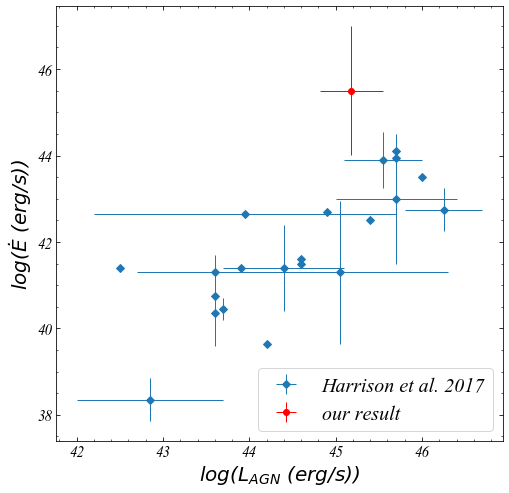

In [12]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/draft_code/paper/ApJtemplate/figs/'
fig,ax=plt.subplots(1,1)
# ax.scatter(LAGNmean_log,Eoutmean_log,marker='s',label='Harrison et al. 2017')
# ax.scatter(LAGNmean_B_log,Eoutmean_B_log,marker='*',
#            color='red',label='our result',linewidth=10)
ax.errorbar(LAGNmean_log,Eoutmean_log,
            xerr=(LAGNlow_logerr,LAGNhigh_logerr),
            yerr=(Eoutlow_logerr,Eouthigh_logerr),
            fmt='D',label='Harrison et al. 2017')
ax.errorbar(LAGNmean_B_log,Eoutmean_B_log,
            xerr=(np.array([LAGNlow_B_logerr]),np.array([LAGNhigh_B_logerr])),
            yerr=(np.array([Eoutlow_B_logerr]),np.array([Eouthigh_B_logerr])),
            fmt='o',color='red',label='our result')
ax.set_xlabel(r'$\rm log(L_{AGN} \ (erg/s))$',fontsize=20)
ax.set_ylabel(r'$\rm log(\dot{E} \ (erg/s))$',fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.legend(prop={'size': 20},loc='lower right')
plt.rcParams['figure.figsize'] = [8, 8]
plt.savefig(dic+'E_out_vs_L_AGN.png',dpi=300)
# plt.show()

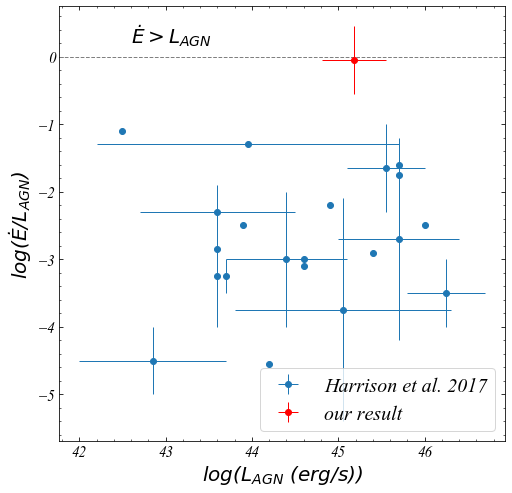

In [13]:
fig,ax=plt.subplots(1,1)
ax.errorbar(np.array([LAGNmean_log]),np.array([couplingAGNmean_log]),
            xerr=(np.array([LAGNlow_logerr]),np.array([LAGNhigh_logerr])),
            yerr=(np.array([couplingAGNlow_logerr]),np.array([couplingAGNhigh_logerr])),
            fmt='o',label='Harrison et al. 2017')
ax.errorbar(np.array([LAGNmean_B_log]),np.array([couplingAGNmean_B_log]),
            xerr=(np.array([LAGNlow_B_logerr]),np.array([LAGNhigh_B_logerr])),
            yerr=(np.array([couplingAGNlow_logerr]),np.array([couplingAGNhigh_logerr])),
            fmt='o',color='red',label='our result')
ax.axhline(0,color='gray',ls='--')
ax.text(42.6,0.2,'$\dot{E}>L_{AGN}$',fontsize=20)
ax.set_xlabel(r'$\rm log(L_{AGN} \ (erg/s))$',fontsize=20)
ax.set_ylabel(r'$\rm log(\dot{E}/L_{AGN})$',fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.legend(prop={'size': 20},loc='lower right')
plt.rcParams['figure.figsize'] = [8, 8]
plt.savefig(dic+'cp_AGN_vs_L_AGN.png',dpi=300)
# plt.show()

In [14]:
# Eoutlow_log=couplingAGNlow_log+LAGNmean_log
# Ehighlow_log=couplingAGNhigh_log+LAGNmean_log
# Ehighmean_log=couplingAGNmean_log+LAGNmean_log
couplingAGNhigh=10**(couplingAGNhigh_log)
couplingAGNlow=10**(couplingAGNlow_log)
couplingAGNmean=10**(couplingAGNmean_log)

couplingAGNhigh_B=10**(couplingAGNhigh_B_log)
couplingAGNlow_B=10**(couplingAGNlow_B_log)
couplingAGNmean_B=10**(couplingAGNmean_B_log)

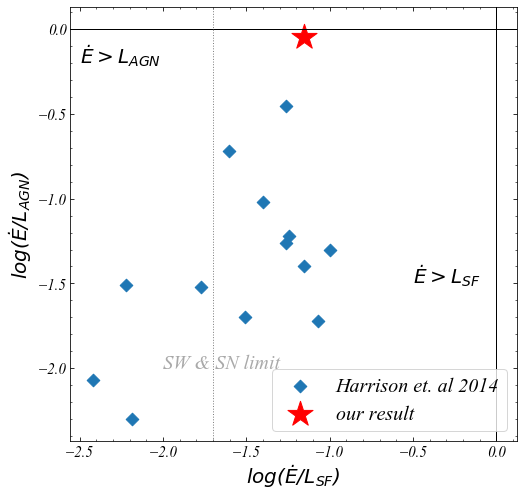

In [15]:
cou_AGN=np.array([0.5,0.85,1.9,2,3,3.1,4,5,5.5,6,9.5,19,35])*0.01
cou_SF=np.array([0.65,0.38,8.5,3.1,1.7,0.6,7.,10.01,5.5,5.7,4.,2.5,5.5])*0.01
cou_AGN=np.log10(cou_AGN)
cou_SF=np.log10(cou_SF)

fig,ax=plt.subplots(1,1)
ax.scatter(cou_SF,cou_AGN,s=80,marker='D',label='Harrison et. al 2014')
ax.scatter(np.array([couplingSFmean_B_log]),np.array([couplingAGNmean_B_log]),
           marker='*',s=700,color='red',label='our result')
ax.set_xlabel(r'$\rm log(\dot{E}/L_{SF})$',fontsize=20)
ax.set_ylabel(r'$\rm log(\dot{E}/L_{AGN})$',fontsize=20)
ax.text(-2.5,-0.2,r'$\rm \dot{E}>L_{AGN}$',fontsize=20)
ax.text(-0.5,-1.5,r'$\rm \dot{E}>L_{SF}$',fontsize=20)
ax.text(-2,-2.,'SW & SN limit',color='darkgray',fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.legend(prop={'size': 20})
ax.axhline(0,color='black',ls='-')
ax.axvline(0,color='black',ls='-')
ax.axvline(np.log10(0.02),color='gray',ls='dotted')
plt.rcParams['figure.figsize'] = [8, 8]
plt.savefig(dic+'cp_AGN_vs_cp_SF.png',dpi=300)
# plt.show()

1.7234502026483833


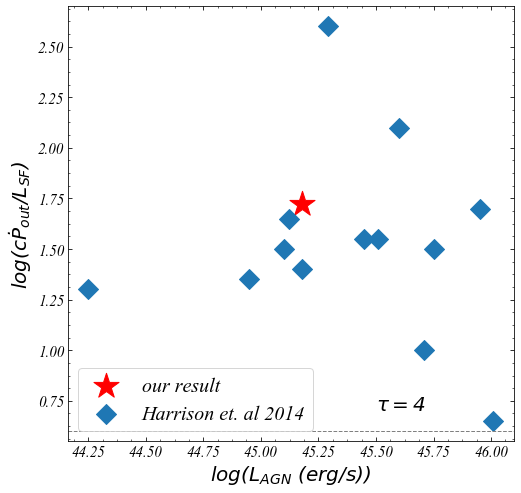

In [16]:
PSFhigh_B_log=np.log10((const.c*Pout_up).to(u.erg/u.s)/L_SFB_high)
PSFlow_B_log=np.log10((const.c*Pout_low).to(u.erg/u.s)/L_SFB_high)
PSFmean_B_log,PSFhigh_B_logerr,PSFlow_B_logerr=Highlow2mean(PSFhigh_B_log,PSFlow_B_log)

L_AGN_log=np.array([44.25,44.95,45.1,45.12,45.18,45.29,45.45,45.51,45.6,45.71,45.75,45.95,46.01])
PSF_mean_log=np.array([1.3,1.35,1.5,1.65,1.4,2.6,1.55,1.55,2.1,1.0,1.5,1.7,0.65])
fig,ax=plt.subplots(1,1)
ax.scatter(np.array([LAGNmean_B_log]),np.array([PSFmean_B_log]),
           marker='*',s=700,color='red',label='our result')
ax.scatter(L_AGN_log,PSF_mean_log,marker='D',s=200,label='Harrison et. al 2014')
ax.axhline(np.log10(4),color='gray',ls='--')
ax.text(45.5,np.log10(4)+.1,r'$\tau =4$',fontsize=20)
ax.set_xlabel(r'$\rm log(L_{AGN} \ (erg/s))$',fontsize=20)
ax.set_ylabel(r'$\rm log(c\dot{P}_{out}/L_{SF})$',fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.legend(prop={'size': 20},loc='lower left')
plt.rcParams['figure.figsize'] = [8, 8]
print(PSFmean_B_log)
plt.savefig(dic+'P_outSF_vs_L_AGN.png',dpi=300)

3.198213835592594


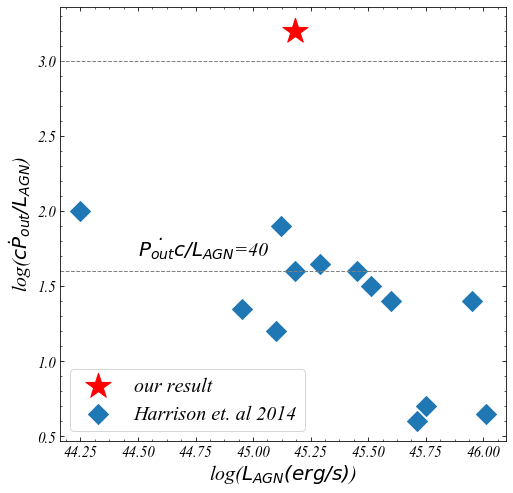

In [26]:
PAGNhigh_B_log=np.log10((const.c*Pout_up).to(u.erg/u.s)/L_AGNB_high)
PAGNlow_B_log=np.log10((const.c*Pout_low).to(u.erg/u.s)/L_AGNB_low)
PAGNmean_B_log,PAGNhigh_B_logerr,PAGNlow_B_logerr=Highlow2mean(PAGNhigh_B_log,PAGNlow_B_log)

PAGN_mean_log=np.array([2.,1.35,1.2,1.9,1.6,1.65,1.6,1.5,1.4,0.6,0.7,1.4,0.65])

fig,ax=plt.subplots(1,1)
# ax.errorbar(np.array([LAGNmean_B_log]),np.array([PAGNmean_B_log]),
#             xerr=(np.array([LAGNlow_B_logerr]),np.array([LAGNhigh_B_logerr])),
#             yerr=(np.array([PAGNlow_B_logerr]),np.array([PAGNhigh_B_logerr])),
#             fmt='o',color='red',label='our result')
ax.scatter(np.array([LAGNmean_B_log]),np.array([PAGNmean_B_log]),
           marker='*',s=700,color='red',label='our result')
ax.scatter(L_AGN_log,PAGN_mean_log,marker='D',s=200,label='Harrison et. al 2014')
ax.axhline(np.log10(40),color='gray',ls='--')
ax.axhline(np.log10(1000),color='gray',ls='--')
ax.text(44.5,np.log10(40)+.1,r'$\dot{P_{out}}c/L_{AGN}$=40',fontsize=20)
ax.set_xlabel('log($L_{AGN}(erg/s)$)',fontsize=20)
ax.set_ylabel('log($c\dot{P}_{out}/L_{AGN}$)',fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.legend(prop={'size': 20})
plt.rcParams['figure.figsize'] = [8, 8]
print(PAGNmean_B_log)
plt.savefig(dic+'P_outAGN_vs_L_AGN.png',dpi=300)
# plt.show()

## Radio-excess Calculation

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const

calculate the observed wavelength

In [2]:
mu_VLA=35*u.GHz
mu_ALMA=150*u.GHz
mu_14=1.4*u.GHz/3.3


lamda_VLA=(const.c/mu_VLA).to(u.um)
lamda_ALMA=(const.c/mu_ALMA).to(u.um)
lamda_14=(const.c/mu_14).to(u.um)
print(lamda_VLA,lamda_ALMA,lamda_14)

8565.498800000001 um 1998.6163866666668 um 706653.6510000001 um


the upper limit is:

$f_{8565}=0.05046032$mJy

$f_{1998}=0.01629476$mJy

In [3]:
L_IR=(8e11+2.4e12)*u.L_sun
D_L=18773.8*u.Mpc
f=L_IR/(4*np.pi*(D_L**2))
f=f.to(u.W/(u.m**2)).value
f

2.904735410434706e-16

In [4]:
flux_density=1e-3*u.jansky
flux_density=flux_density.to(u.W/(u.Hz*(u.m**2))).value
flux_density

1.0000000000000001e-29

In [7]:
np.log10((f/3.75e12)/flux_density)

0.8890753113320115

In [16]:
f14_low=((f/3.75e12)/np.power(10,1.8))*u.W/(u.Hz*(u.m**2))
f14_low.to(u.mJy)

<Quantity 0.12276521 mJy>

calculate uncertainty of q

In [6]:
sigma_s_ir=np.sqrt((1.2**2)+(21**2))
sigma_s_ir=sigma_s_ir*1e11*u.L_sun/(4*np.pi*(D_L**2))
sigma_s_ir=sigma_s_ir.to(u.W/(u.m**2)).value
sigma_14=(3.44e-6*u.jansky).to(u.W/(u.Hz*(u.m**2))).value


sigma_s_ir=sigma_s_ir/f
sigma_s_14=sigma_14/flux_density
sigma_q=(1/np.log(10))*np.sqrt((sigma_s_ir**2)+(sigma_s_14**2))
sigma_q

0.2854745992629486